In [ ]:
import pandas as pd
import numpy as np
import nltk as nt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from collections import Counter
from sklearn.model_selection import train_test_split
import tensorflow as tf
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer,ToktokTokenizer

In [ ]:
#a= {'message':["good night","good morning","happy diwali","happy christmas","happy new year","notice","fraud","alert","important notice","sharechat"],'spam/ham':["spam","spam","spam","spam","spam","ham","spam","spam","ham","spam"]}
data= pd.read_excel("Spam_data.xlsx")
#data.columns=['index','message','spam/ham']
data

,message,spam/ham,hindi,marathi
0,good night,spam,शुभ रात्रि,शुभ रात्री
1,good morning,spam,शुभ प्रभात,शुभ प्रभात
2,happy diwali,spam,दीपावली की हार्दिक शुभकामनाएं,दिवाळीच्या शुभेच्छा
3,happy christmas,spam,क्रिसमस की शुभकामना,आनंदी ख्रिसमस
4,happy new year,spam,नए साल की शुभकामनाएँ,नवीन वर्षाच्या शुभेच्छा
...,...,...,...,...
166,"Paytm Money Sent Successfully 1,000 Rupees One...",ham,"पेटीएम मनी सफलतापूर्वक 1,000 रुपये केवल एक हजा...","Paytm मनी 1,000 रुपये एक हजार यशस्वीरित्या पाठ..."
167,Semiconductor agreement will be a game changer...,spam,सेमीकंडक्टर समझौता गेम चेंजर होगा दिसंबर 2024 ...,सेमी कंडक्टर करार गेम चेंजर ठरणार २०२४ डिसेंबर...
168,a Search Posts #FakeNews 20hO Ministry of Heal...,spam,एक खोज पोस्ट #FakeNews 20hO स्वास्थ्य और परिवा...,शोध पोस्ट #FakeNews 20hO आरोग्य आणि कुटुंब कल्...
169,Scorpion Bite Treatment Grind the scent of fiv...,spam,बिच्छू काटने का इलाज माचिस की पांच-सात तीलियों...,विंचू चावणे उपचार पाच-सात माचिसच्या काड्यांचा ...


In [ ]:
df = data.where((pd.notnull),' ')
# df =data
df.loc[df['spam/ham']=="spam","spam/ham"]=1
df.loc[df['spam/ham']=="ham","spam/ham"]=0
df

,message,spam/ham,hindi,marathi
0,good night,1,शुभ रात्रि,शुभ रात्री
1,good morning,1,शुभ प्रभात,शुभ प्रभात
2,happy diwali,1,दीपावली की हार्दिक शुभकामनाएं,दिवाळीच्या शुभेच्छा
3,happy christmas,1,क्रिसमस की शुभकामना,आनंदी ख्रिसमस
4,happy new year,1,नए साल की शुभकामनाएँ,नवीन वर्षाच्या शुभेच्छा
...,...,...,...,...
166,"Paytm Money Sent Successfully 1,000 Rupees One...",0,"पेटीएम मनी सफलतापूर्वक 1,000 रुपये केवल एक हजा...","Paytm मनी 1,000 रुपये एक हजार यशस्वीरित्या पाठ..."
167,Semiconductor agreement will be a game changer...,1,सेमीकंडक्टर समझौता गेम चेंजर होगा दिसंबर 2024 ...,सेमी कंडक्टर करार गेम चेंजर ठरणार २०२४ डिसेंबर...
168,a Search Posts #FakeNews 20hO Ministry of Heal...,1,एक खोज पोस्ट #FakeNews 20hO स्वास्थ्य और परिवा...,शोध पोस्ट #FakeNews 20hO आरोग्य आणि कुटुंब कल्...
169,Scorpion Bite Treatment Grind the scent of fiv...,1,बिच्छू काटने का इलाज माचिस की पांच-सात तीलियों...,विंचू चावणे उपचार पाच-सात माचिसच्या काड्यांचा ...


In [ ]:
y= df['spam/ham']
x=df['marathi']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
stop_words_marathi=['असलेल्या', 'असा', 'असून', 'असे', 'आणि', 'आता', 'आपल्या', 'आला', 'आली', 'आले', 'आहे', 'आहेत', 'एक', 'एका', 'कमी', 'करणयात', 'करून', 'का', 'काम', 'काय', 'काही', 'किवा', 'की', 'केला', 'केली', 'केले', 'कोटी', 'गेल्या', 'घेऊन', 'जात', 'झाला', 'झाली', 'झाले', 'झालेल्या', 'टा', 'डॉ', 'तर', 'तरी', 'तसेच', 'ता', 'त्या', 'त्याचा', 'त्याची', 'त्याच्या', 'त्याना', 'त्यानी', 'त्यामुळे', 'त्री', 'दिली', 'दिलेल्या', 'दुसर्‍या', 'दोन', 'धरून', 'न', 'नाही', 'निर्ण्‍य', 'पण', 'पम', 'परयतन', 'पाटील', 'म', 'मात्र', 'माहिती', 'मी', 'मुबी', 'म्हणजे', 'म्हणाले', 'म्हणून', 'म्हणे', 'या', 'याचा', 'याची', 'याच्या', 'याना', 'यानी', 'येणार', 'येत', 'येथील', 'येथे', 'लाख', 'व', 'व्यकत', 'सर्व', 'सागित्ले', 'सुरू', 'हजार', 'हा', 'ही', 'हे', 'होणार', 'होत', 'होता', 'होती', 'होते']
hindi_stop_words = [
    'अंदर', 'अत', 'अदि', 'अप', 'अपना', 'अपनि', 'अपनी', 'अपने', 'अभि', 'अभी', 'आदि', 'आप', 'इंहिं', 'इंहें', 'इंहों', 'इतयादि', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकि', 'इसकी', 'इसके', 'इसमें', 'इसि', 'इसी', 'इसे', 'उंहिं', 'उंहें', 'उंहों', 'उन', 'उनका', 'उनकि', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 'उसके', 'उसि', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'एसे', 'ऐसे', 'ओर', 'और', 'कइ', 'कई', 'कर', 'करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफि', 'काफ़ी', 'कि', 'किंहें', 'किंहों', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसि', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोइ', 'कोई', 'कोन', 'कोनसा', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जहां', 'जा', 'जिंहें', 'जिंहों', 'जितना', 'जिधर', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जेसा', 'जेसे', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिंहें', 'तिंहों', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थि', 'थी', 'थे', 'दबारा', 'दवारा', 'दिया', 'दुसरा', 'दुसरे', 'दूसरे', 'दो', 'द्वारा', 'न', 'नहिं', 'नहीं', 'ना', 'निचे', 'निहायत', 'नीचे', 'ने', 'पर', 'पहले', 'पुरा', 'पूरा', 'पे', 'फिर', 'बनि', 'बनी', 'बहि', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भि', 'भितर', 'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यहां', 'यहि', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रवासा', 'रहा', 'रहे', 'ऱ्वासा', 'लिए', 'लिये', 'लेकिन', 'व', 'वगेरह', 'वरग', 'वर्ग', 'वह', 'वहाँ', 'वहां', 'वहिं', 'वहीं', 'वाले', 'वुह', 'वे', 'वग़ैरह', 'संग', 'सकता', 'सकते', 'सबसे', 'सभि', 'सभी', 'साथ', 'साबुत', 'साभ', 'सारा', 'से', 'सो', 'हि', 'ही', 'हुअं', 'हुआ', 'हुइ', 'हुई', 'हुए', 'हे', 'हें', 'है', 'हैं', 'हो', 'होता', 'होति', 'होती', 'होते', 'होना', 'होने'
]

In [ ]:
def tokenizer(text):
    tok = TweetTokenizer()
    return tok.tokenize(text)

def tokenizer_2(text):
    tok = ToktokTokenizer()
    return tok.tokenize(text)

In [ ]:
feature_extraction = TfidfVectorizer(min_df=1,stop_words=stop_words_marathi,lowercase=True,ngram_range=(1,2),tokenizer=tokenizer_2)
x_train_feature = feature_extraction.fit_transform(x_train)
x_test_feature = feature_extraction.transform(x_test)
y= y.astype('int')
y_train= y_train.astype('int')

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
model = LogisticRegression()
model.fit(x_train_feature,y)

ValueError: ignored

In [ ]:
x_train_feature_dense = x_train_feature.toarray()
input_shape = x_train_feature_dense.shape[1:]
print(pd.DataFrame( x_train_feature_dense))

     0     1     2     3     4     5     6     7     8     9     ...  3669  \
0     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
131   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
132   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
133   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
134   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
135   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

     3670  3671  3672  3673  3674  3675  3676  3677      3678  

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights based on the distribution in y_train
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)

# Create a dictionary mapping class indices to their respective weights
class_weight_dict = {class_idx: weight for class_idx, weight in enumerate(class_weights)}
print(class_weight_dict)


{0: 1.2142857142857142, 1: 0.85}


In [ ]:
# Convert SparseTensor to dense array
x_train_feature_dense = x_train_feature.toarray()
embedding_dim = 50
input_shape = x_train_feature_dense.shape[1:]
print(input_shape)
tf_model_mar = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),  # Adjust the input shape based on your dataset
    tf.keras.layers.Dense(2, activation='sigmoid'),
])
tf_model_mar.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the TensorFlow model using data from scikit-learn
history = tf_model_mar.fit(x_train_feature_dense,y_train,epochs=100)
tf_model_mar.summary()

(3679,)
Epoch 1/100
5/5 [==============================] - 1s 7ms/step - loss: 0.6909 - accuracy: 0.5662
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6811 - accuracy: 0.7206
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6720 - accuracy: 0.7941
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6631 - accuracy: 0.8676
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6549 - accuracy: 0.8824
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6467 - accuracy: 0.9044
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6387 - accuracy: 0.9044
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6314 - accuracy: 0.9044
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6239 - accuracy: 0.9044
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6167 - accuracy: 0.9118
Epoch 11/100
5/5 [===

In [ ]:
# x_test_feature = feature_extraction.transform(x_test)
x_test_feature_dense = x_test_feature.toarray()

# Convert the NumPy array to a SparseTensor
x_test_feature_sparse = tf.sparse.from_dense(x_test_feature_dense)

# Reorder the indices of the SparseTensor
# x_test_feature_ordered = tf.sparse.reorder(x_test_feature_sparse)

# Now, you can use x_test_feature_ordered for prediction
y_pred_tf = tf_model_mar.predict(x_test_feature_sparse)

# Convert the one-hot encoded predictions to class labels
y_pred_tf_classes = tf.argmax(y_pred_tf, axis=1)

# Calculate the accuracy of the TensorFlow model
accuracy_tf = accuracy_score(y_test.astype('int'), y_pred_tf_classes.numpy())
print("Accuracy of TensorFlow model:", accuracy_tf)

2/2 [==============================] - 0s 6ms/step
Accuracy of TensorFlow model: 0.8571428571428571


In [ ]:
b=input("Enter text: ")
input_message =[b]
input_data_feature = feature_extraction.transform(input_message)
input_data_feature = input_data_feature.toarray()
y_pred_tf = tf_model_mar.predict(input_data_feature)
a=tf.argmax(y_pred_tf, axis=1)
print(a)
values=a.numpy()
print(values, input_data_feature.shape)

for value in values:
  print(value)
#spam 1 ham 0

Enter text: 8 KIT/CEK NO 1627 4 7 6 1 2 3 5 RSNe 1R&6cku Shirgp1 2 Msharters NoA Wetww kicek अ क्र नोटीस शैक्षणिक वर्ष २०२३-२४ मध्धये नियमित प्रवेश घेतलेल्या फक्त sc प्रवर्गातील ज्या विद्याथ्ध्याच्या पालकांचे वार्षिक उत्पन्न दोन लाख पत्नास हजार पेक्षा कमी आहे व महाविद्यालयाचे वसतिगृह / खाजगी वसती गृह वास्तव्यास असणान्या विध्याथ्ध्यासाठी २०२३२४ सालंकारिता स्वाधार योजनेचे अर्ज भरण्यास सुरुवात झाली आहे. तरी २५/११/२०२३ पूर्वी महाविद्यालयामध्ये जमा करावेत. स्वाधार योजनेचा अर्ज धारणेसाठी खालीलप्रमाणे कागदपत्रे जोड़ावीत. तपशील Actedted आधार संलझ्नित असलेले बँक पास बुक COLLEGE OF T oHAPUR 7 NOV 2023 अर्ज- महाविद्यालयाच्या आवारातील झेरॉकस सेंटर मध्ये उपलब्ध आहे. जात प्रमाणपत्र व जात वैधता प्रमाणपत्र विद्याथ्ध्याचा महाराट्रातील रहिवासी दाखला (तहसीलदार यांच्या सहीचा) आधार कार्ड वडिलांच्या नावाचा उत्पन्नाचा दाखला २,५०,००० /-च्या आतील. | (तहसीलदार यांच्या सहीचा) शेवट वर्षचिे गुणपत्रक किमान ५०% गुण आवश्यक, बोनाफाईड सर्टिफिकेट ING Kelheeut 9 हॉस्टेल मध्ये राहत असलेबाबतचे प्रमाणपत्र, खाजगी वसतिगृहात व

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(tf_model_mar)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('spamsnap_model_marathi.tflite', 'wb') as f:
    f.write(tflite_model)

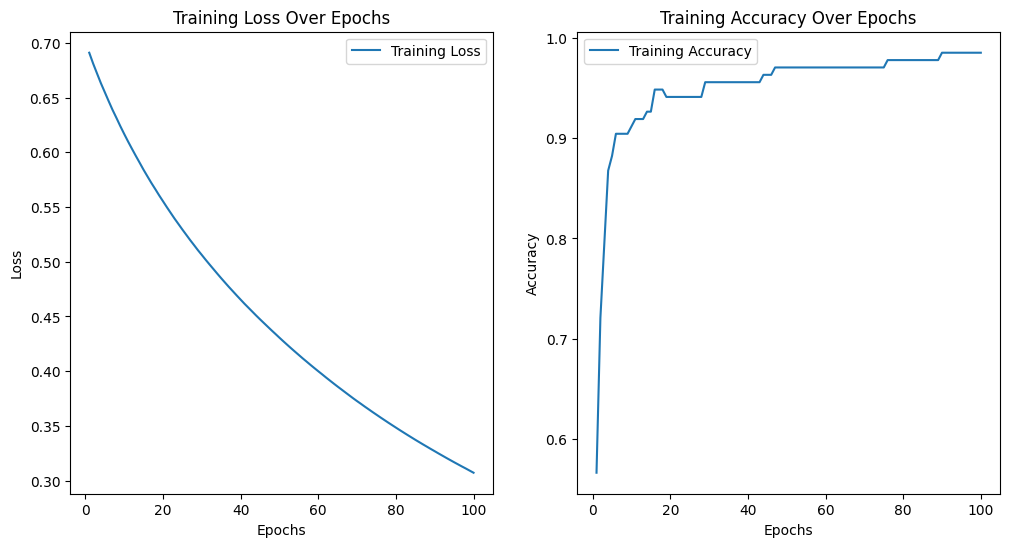

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy over epochs
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
b=input("Enter text: ")
input_message =[b]
input_data_feature = feature_extraction.transform(input_message)
predict_input = model.predict(input_data_feature)
print(predict_input)
if(predict_input)[0]==1:
    print("ham message")
else:
	print("spam message")

In [ ]:
c=input("Enter text: ")
input_message_mar =[c]
input_data_feature = feature_extraction_marathi.transform(input_message_mar)
predict_input = model2.predict(input_data_feature)
print(predict_input)
if(predict_input)[0]==1:
    print("ham message")
else:
	print("spam message")

In [ ]:
d=input("Enter text: ")
input_message_hin =[d]
input_data_feature = feature_extraction_hindi.transform(input_message_hin)
predict_input = model3.predict(input_data_feature)
print(predict_input)
if(predict_input)[0]==1:
    print("ham message")
else:
	print("spam message")

In [ ]:
text = "good night"
language = detect(text)

print(language)

In [ ]:
d=input("Enter text: ")
input_message=[d]
language = detect(d)
print(language)
if language=='mr':
  input_data_feature = feature_extraction_marathi.transform(input_message)
  predict_input = model2.predict(input_data_feature)
  print(predict_input)
  if(predict_input)[0]==1:
      print("ham message")
  else:
    print("spam message")
elif language=='hi':
  input_data_feature = feature_extraction_hindi.transform(input_message)
  predict_input = model3.predict(input_data_feature)
  print(predict_input)
  if(predict_input)[0]==1:
      print("ham message")
  else:
    print("spam message")
elif language=='en':
  input_data_feature = feature_extraction.transform(input_message)
  predict_input = model.predict(input_data_feature)
  print(predict_input)
  if(predict_input)[0]==1:
      print("ham message")
  else:
    print("spam message")
else:
  print("Can'nt Detect Language")


In [ ]:
!pip install langdetect

In [ ]:
!pip install seaborn objects


In [ ]:
import seaborn.objects as so

In [ ]:
nt.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install polyglot

In [ ]:
!pip install PyICU

In [ ]:
!pip install morfessor